You are provided with an anonymized dataset containing a large number of numeric variables. The "TARGET" column is the variable to predict. It equals one for unsatisfied customers and 0 for satisfied customers.

The task is to predict the probability that each customer in the test set is an unsatisfied customer.

File descriptions


train.csv - the training set including the target
test.csv - the test set without the target
sample_submission.csv - a sample submission file in the correct format

From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.


In [1]:
#### Kaggle --- https://www.kaggle.com/c/santander-customer-satisfaction/overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df  = pd.read_csv('sample_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var15', ylabel='Density'>

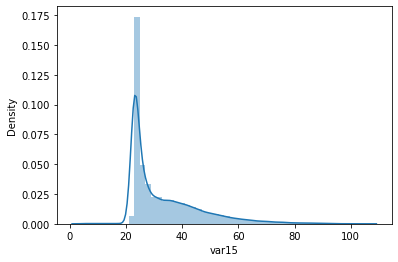

In [5]:
sns.distplot(train_data['var15'])

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var38', ylabel='Density'>

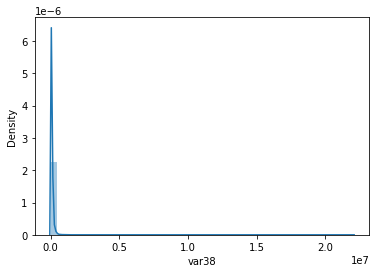

In [6]:
sns.distplot(train_data['var38'])

<AxesSubplot:xlabel='TARGET', ylabel='Count'>

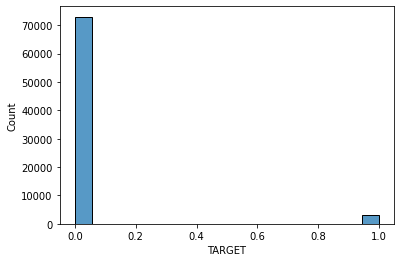

In [7]:
sns.histplot(train_data['TARGET'])

In [8]:
train_data.shape

(76020, 371)

In [9]:
train_data.isnull().sum().any() #### no missing values

False

In [10]:
duplicates = train_data[train_data.duplicated()]
duplicates ##### No duplicates

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET


In [11]:
train_data.select_dtypes(include='object') ##### no categorical features ---- object,bool

""
0
1
2
3
4
...
76015
76016
76017
76018


In [12]:
train_data.select_dtypes(include=['float64','int64']) #### 371 numeric columns

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [13]:
train_data['var15'].value_counts()[:10]

23    20170
24     6232
25     4217
26     3270
27     2861
28     2173
31     1798
29     1727
30     1640
32     1592
Name: var15, dtype: int64

In [14]:
train_data['var38'].value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
                 ...  
323572.860000        1
126512.400000        1
237928.980000        1
76654.380000         1
87671.220000         1
Name: var38, Length: 57736, dtype: int64

In [15]:
train_data['var3'].value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [16]:
###### repalcing -999999 with 2 

train_data['var3'] = train_data['var3'].replace(-999999, 2)

In [17]:
########## checking for coreelation #############
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [18]:
correlation(train_data,0.95)

{'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_ult1',
 'imp_aport_var17_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_reemb_var33_ult1',
 'imp_trasp_var33_out_ult1',
 'imp_venta_var44_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var13_medio',
 'ind_var18',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var32',
 'ind_var34',
 'ind_var37',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var4

In [19]:
##### Dropping highly corelated columns #####################

train_data =  train_data.drop(['delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_ult1',
 'imp_aport_var17_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_reemb_var33_ult1',
 'imp_trasp_var33_out_ult1',
 'imp_venta_var44_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var13_medio',
 'ind_var18',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var32',
 'ind_var34',
 'ind_var37',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_meses_var12_ult3',
 'num_meses_var13_corto_ult3',
 'num_meses_var13_medio_ult3',
 'num_meses_var33_ult3',
 'num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3',
 'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_op_var40_ult3',
 'num_op_var41_comer_ult1',
 'num_op_var41_comer_ult3',
 'num_reemb_var13_ult1',
 'num_reemb_var17_hace3',
 'num_reemb_var33_ult1',
 'num_trasp_var17_in_hace3',
 'num_trasp_var17_in_ult1',
 'num_trasp_var17_out_ult1',
 'num_trasp_var33_in_hace3',
 'num_trasp_var33_out_ult1',
 'num_var1',
 'num_var12',
 'num_var13',
 'num_var13_0',
 'num_var13_corto',
 'num_var13_corto_0',
 'num_var13_largo',
 'num_var13_medio',
 'num_var13_medio_0',
 'num_var14',
 'num_var18',
 'num_var18_0',
 'num_var1_0',
 'num_var20',
 'num_var20_0',
 'num_var24',
 'num_var24_0',
 'num_var25',
 'num_var25_0',
 'num_var26',
 'num_var29',
 'num_var29_0',
 'num_var32',
 'num_var33',
 'num_var34',
 'num_var34_0',
 'num_var35',
 'num_var37',
 'num_var39',
 'num_var40',
 'num_var40_0',
 'num_var41_0',
 'num_var44',
 'num_var44_0',
 'num_var45_ult3',
 'num_var5',
 'num_var6',
 'num_var6_0',
 'num_var7_emit_ult1',
 'num_var8',
 'num_var8_0',
 'saldo_medio_var12_ult1',
 'saldo_medio_var12_ult3',
 'saldo_medio_var13_corto_ult1',
 'saldo_medio_var13_corto_ult3',
 'saldo_medio_var13_largo_ult3',
 'saldo_medio_var13_medio_hace2',
 'saldo_medio_var13_medio_ult1',
 'saldo_medio_var13_medio_ult3',
 'saldo_medio_var17_hace2',
 'saldo_medio_var17_hace3',
 'saldo_medio_var17_ult1',
 'saldo_medio_var17_ult3',
 'saldo_medio_var29_ult3',
 'saldo_medio_var33_ult1',
 'saldo_medio_var33_ult3',
 'saldo_medio_var44_ult3',
 'saldo_var18',
 'saldo_var24',
 'saldo_var25',
 'saldo_var29',
 'saldo_var31',
 'saldo_var42',
 'saldo_var6'],axis=1)

In [20]:
train_data.shape

(76020, 241)

In [21]:
X = train_data.drop(['ID','TARGET'],axis=1)
y = train_data['TARGET']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_Scaled = sc.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train_scaled,y_train)
pred_y = clf_lr.predict(X_test_Scaled)

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21892
           1       0.17      0.00      0.01       914

    accuracy                           0.96     22806
   macro avg       0.56      0.50      0.49     22806
weighted avg       0.93      0.96      0.94     22806



In [25]:
clf_lr.score(X_train_scaled,y_train)

0.9604615326793701

In [26]:
clf_lr.score(X_test_Scaled,y_test)

0.9593966500043848

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y))

[[21877    15]
 [  911     3]]


In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_y))

0.9593966500043848


<AxesSubplot:ylabel='Count'>

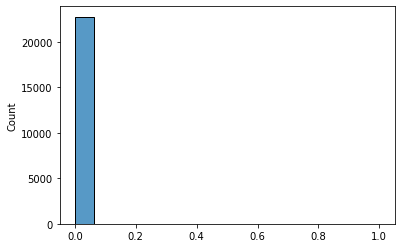

In [29]:
sns.histplot(pred_y)

<AxesSubplot:xlabel='TARGET', ylabel='Count'>

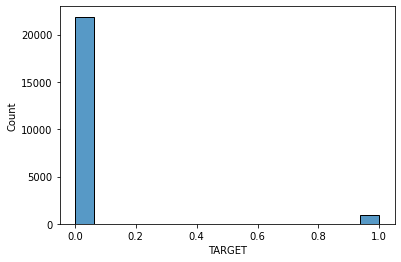

In [30]:
sns.histplot(y_test)

NOTE : 925 rows ---- predicted as 0 but actual it is 0

In [31]:
################### KNN ####
import time
start = time.time()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train_scaled,y_train)
knn_y_pred = knn_clf.predict(X_test_Scaled)

print("Accuracy of train data: " ,knn_clf.score(X_train_scaled,y_train))
print("Accuracy of test data: " , knn_clf.score(X_test_Scaled,y_test))

end = time.time()
print(end - start)

Accuracy of train data:  0.9650843762919532
Accuracy of test data:  0.9573796369376479
105.6534583568573


In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,knn_y_pred))

[[21816    76]
 [  896    18]]


In [33]:
84+893 #### 977 records 

977

NOTE : 977 rows ---- predicted as 0 but actual it is 0

<AxesSubplot:ylabel='Count'>

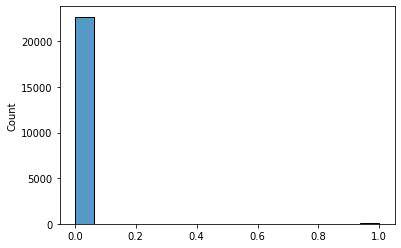

In [34]:
sns.histplot(knn_y_pred)

<AxesSubplot:xlabel='TARGET', ylabel='Count'>

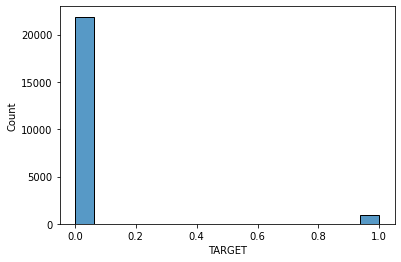

In [35]:
sns.histplot(y_test)

In [36]:
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds)

In [37]:
seconds = 145.80297660827637
convert(seconds)

'0:02:25'

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train_scaled,y_train)
rf_y_pred = clf_rf.predict(X_test_Scaled)

print("Accuracy of train data: " , clf_rf.score(X_train_scaled,y_train))
print("Accuracy of test data: " , clf_rf.score(X_test_Scaled,rf_y_pred))

Accuracy of train data:  0.99592212575638
Accuracy of test data:  1.0


In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,rf_y_pred))

[[21680   212]
 [  865    49]]


In [40]:
206+867 ########## 1073 records 

1073

NOTE : 1073 rows ---- predicted as 0 but actual it is 0

In [41]:
############### hyper paramter tuning #############################
################ Grid Serach CV ################
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(clf_rf, parameters)
grid_obj = grid_obj.fit(X_train_scaled, y_train)


rf_best = grid_obj.best_estimator_
print("best parameters for RFC:",rf_best)

rf_best.fit(X_train_scaled,y_train)
rf_y_pred_best = rf_best.predict(X_test_Scaled)

print("Accuracy of train data after HPT: " , rf_best.score(X_train_scaled,y_train))
print("Accuracy of test data after HPT : " , rf_best.score(X_test_Scaled,rf_y_pred_best))

best parameters for RFC: RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=3, n_estimators=6)
Accuracy of train data after HPT:  0.9609689179539219
Accuracy of test data after HPT :  1.0


In [ ]:
from sklearn.svm import SVR
clf_sv = SVR(kernel='linear')
clf_sv.fit(X_train_scaled,y_train)
sv_y_pred = clf_sv.predict(X_test_scaled)


print("Accuracy of train data: " , clf_sv.score(X_train_scaled,y_train))
print("Accuracy of test data: " , clf_sv.score(X_test_Scaled,y_test))